In [1]:
import pandas as pd
import numpy as np

In [2]:
# Read in data
messy_vinyl_data = pd.read_csv("../data/discogs_vinyl_data.csv")

In [3]:
messy_vinyl_data.tail()

,album,price,rating,have,want,genre
10745,"Grateful Dead* - Wake Of The Flood (LP, Album,...",$21.99,Rated: 4.80,49 have,61 want,NaN
10746,"Les Dudek - Les Dudek (LP, Album)",$2.99,Rated: 4.00,58 have,10 want,NaN
10747,Bob Seger & The Silver Bullet Band* - Live Bul...,$12.99,Rated: 3.93,1122 have,94 want,NaN
10748,"Kenny Loggins - Nightwatch (LP, Album, Pit)",$6.99,Rated: 3.73,543 have,52 want,NaN
10749,"Balakirev*, Sir Thomas Beecham, Royal Philharm...",$13.34,Rated: 5.00,78 have,13 want,NaN


In [4]:
# Clean messy data columns
no_genre_vinyl_data = messy_vinyl_data.drop(columns=['genre'])
no_genre_vinyl_data['rating'] = no_genre_vinyl_data['rating'].str.replace('Rated: ', '', regex=True)
no_genre_vinyl_data['price'] = no_genre_vinyl_data['price'].str.replace('$', '', regex=False)
no_genre_vinyl_data['have'] = no_genre_vinyl_data['have'].str.replace(' have', '', regex=True)
no_genre_vinyl_data['have'] = no_genre_vinyl_data['have'].str.replace(' want', '', regex=True)
no_genre_vinyl_data['want'] = no_genre_vinyl_data['want'].str.replace(' want', '', regex=True)
no_genre_vinyl_data['want'] = no_genre_vinyl_data['want'].str.replace(' have', '', regex=True)
no_genre_vinyl_data['album'] = no_genre_vinyl_data['album'].str.replace(r'\s*\(.*?\)', '', regex=True).str.strip()
no_genre_vinyl_data['price'] = no_genre_vinyl_data['price'].str.replace(',', '', regex=True)
no_genre_vinyl_data['price'] = no_genre_vinyl_data['price'].str.replace('', '', regex=True)
no_genre_vinyl_data.head()

,album,price,rating,have,want
0,Nilsson* - Knnillssonn,15.00,4.02,1340,215
1,Rockin' Horse - Rockin' Horse,10.00,4.26,272,212
2,The Beatles - Abbey Road,30.00,4.64,484,1053
3,Rod Stewart - Foot Loose & Fancy Free,3.99,3.70,7628,110
4,Bob Weir - Heaven Help The Fool,6.00,3.90,1770,92


In [5]:
# Fill N/A values
no_genre_vinyl_data['have'] = no_genre_vinyl_data['have'].fillna(0)
no_genre_vinyl_data['want'] = no_genre_vinyl_data['want'].fillna(0)

In [6]:
# Convert data types to numeric
no_genre_vinyl_data['price'] = no_genre_vinyl_data['price'].astype(float)
no_genre_vinyl_data['rating'] = no_genre_vinyl_data['rating'].astype(float)
no_genre_vinyl_data['have'] = no_genre_vinyl_data['have'].astype(int)
no_genre_vinyl_data['want'] = no_genre_vinyl_data['want'].astype(int)

<Axes: >

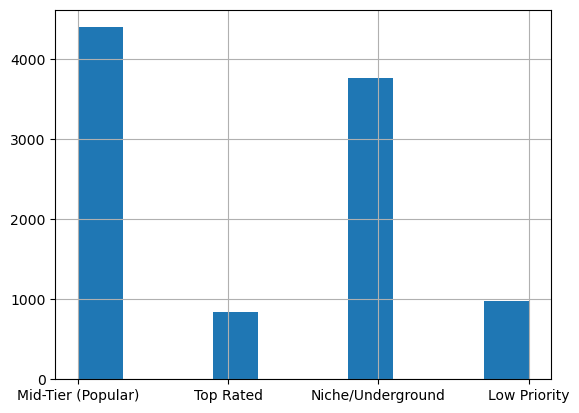

In [7]:
# Establish threshold for high want count
want_threshold = no_genre_vinyl_data['want'].median()

# Filter Top rated records with high demand and high ratings
no_genre_vinyl_data.loc[
    (no_genre_vinyl_data['rating'] > 4.5) & 
    (no_genre_vinyl_data['want'] >= want_threshold), 
    'tier'
] = 'Top Rated'

# Filter Mid-tier records with solid ratings and high demand
no_genre_vinyl_data.loc[
    (no_genre_vinyl_data['rating'].between(3.5, 4.5)) & 
    (no_genre_vinyl_data['want'] >= want_threshold), 
    'tier'
] = 'Mid-Tier (Popular)'

# Filter for Solid ratings with lower demand
no_genre_vinyl_data.loc[
    (no_genre_vinyl_data['rating'] >= 3.5) & 
    (no_genre_vinyl_data['want'] < want_threshold), 
    'tier'
] = 'Niche/Underground'

# Filter for low priority records with low ratings
no_genre_vinyl_data.loc[
    (no_genre_vinyl_data['rating'] < 3.5), 
    'tier'
] = 'Low Priority'

no_genre_vinyl_data['tier'].hist()

In [8]:
# create popularity score between 0 and 1
no_genre_vinyl_data['popularity'] = (
    no_genre_vinyl_data['want'] / (no_genre_vinyl_data['want'] + no_genre_vinyl_data['have'])
)

no_genre_vinyl_data.head()

,album,price,rating,have,want,tier,popularity
0,Nilsson* - Knnillssonn,15.00,4.02,1340,215,Mid-Tier (Popular),0.138264
1,Rockin' Horse - Rockin' Horse,10.00,4.26,272,212,Mid-Tier (Popular),0.438017
2,The Beatles - Abbey Road,30.00,4.64,484,1053,Top Rated,0.685101
3,Rod Stewart - Foot Loose & Fancy Free,3.99,3.70,7628,110,Mid-Tier (Popular),0.014216
4,Bob Weir - Heaven Help The Fool,6.00,3.90,1770,92,Mid-Tier (Popular),0.049409


In [9]:
# Save data to computer
no_genre_vinyl_data.to_csv('discogs_vinyl_data_clean.csv', index=False)